In [50]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib

In [95]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df = pd.read_csv(url)
boston_df.to_csv('boston_housings.csv', index=False)

In [96]:
boston_df.drop('Unnamed: 0', inplace=True, axis=1)

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

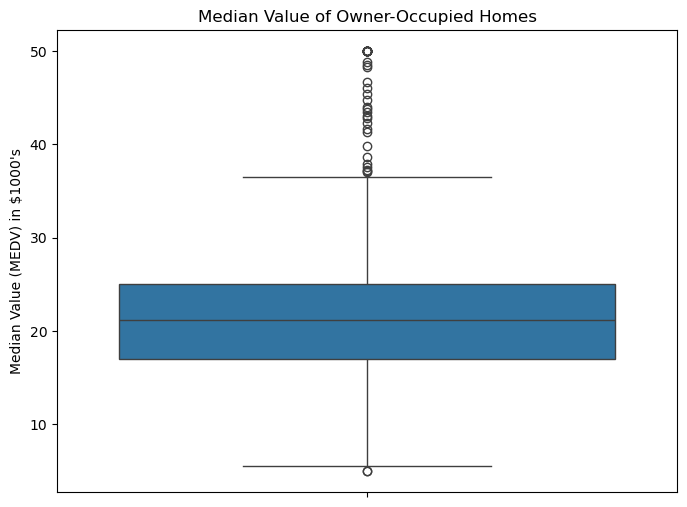

In [ ]:
#Median value of owner-occupied homes"  boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (MEDV) in $1000' +"'" + 's')
plt.show()

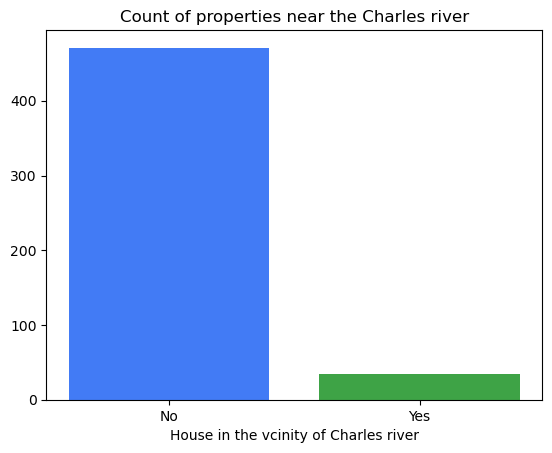

In [ ]:
#the Charles river variable barplot
charles_count_values = boston_df['CHAS'].value_counts()
plt.bar(charles_count_values.index, charles_count_values.values, color=['#427bf5','#3ea346'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('House in the vcinity of Charles river')
plt.title('Count of properties near the Charles river')
plt.show()

In [ ]:
#MEDV variable vs the AGE variable boxplot
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 and less'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 and more'

In [116]:
category_order = ['35 and less','between 35 and 70','70 and more']

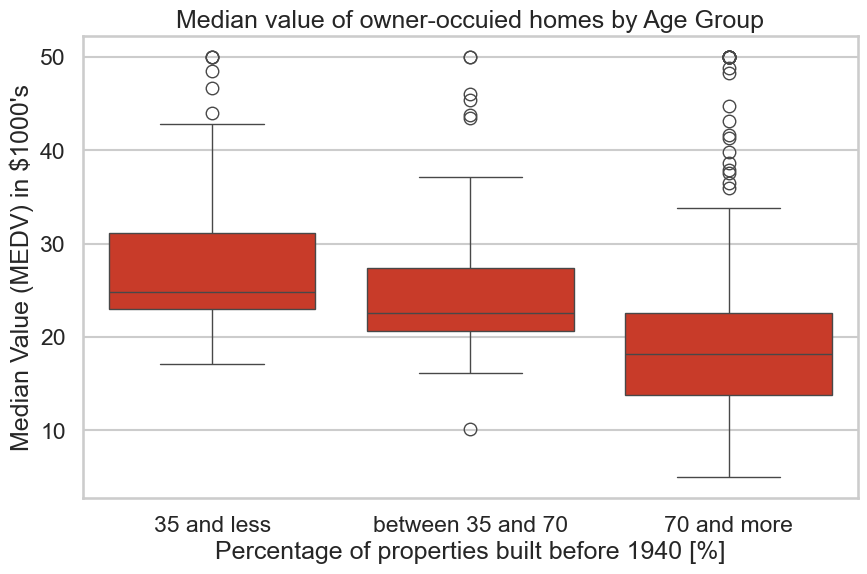

In [ ]:
sns.set_theme(style="whitegrid", context='talk', rc={"figure.figsize": (10, 6)})
sns.boxplot(x=boston_df['age_group'], y=boston_df['MEDV'],color='#e3270e' , order=category_order)
plt.title('Median value of owner-occuied homes by Age Group')
plt.ylabel('Median Value (MEDV) in $1000' +"'" + 's')
plt.xlabel('Percentage of properties built before 1940 [%]')
plt.show()

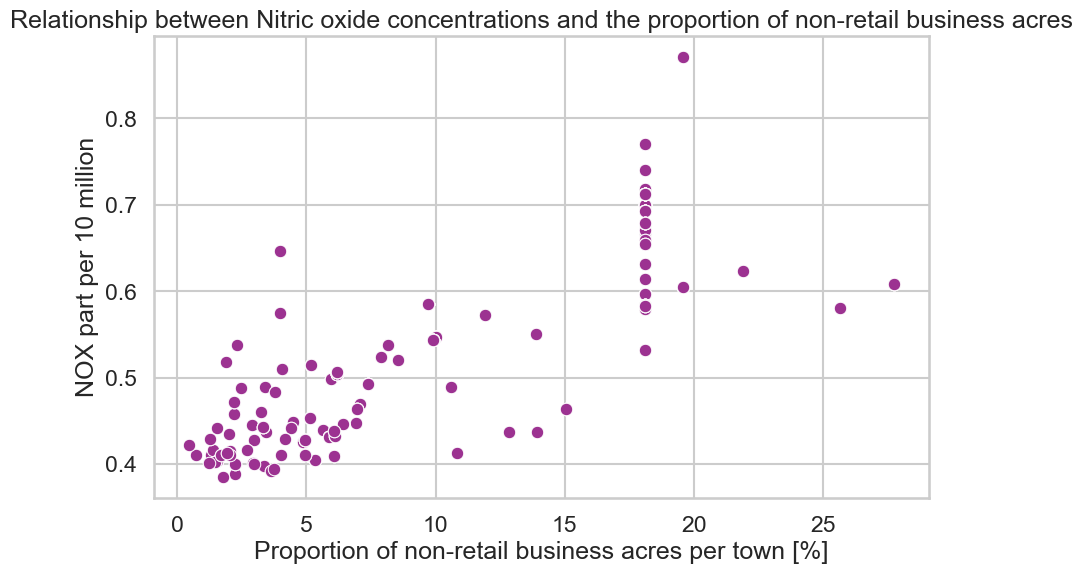

In [132]:
#show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town scatterplot
sns.scatterplot(x=boston_df['INDUS'],y=boston_df['NOX'], color='#9c3291')
plt.xlabel('Proportion of non-retail business acres per town [%]')
plt.ylabel('NOX part per 10 million')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres')
plt.show()

In [ ]:
#There is visible correlation between level of NOX and a proportion of no-retail bussines area. NOX level increses as proportion grows

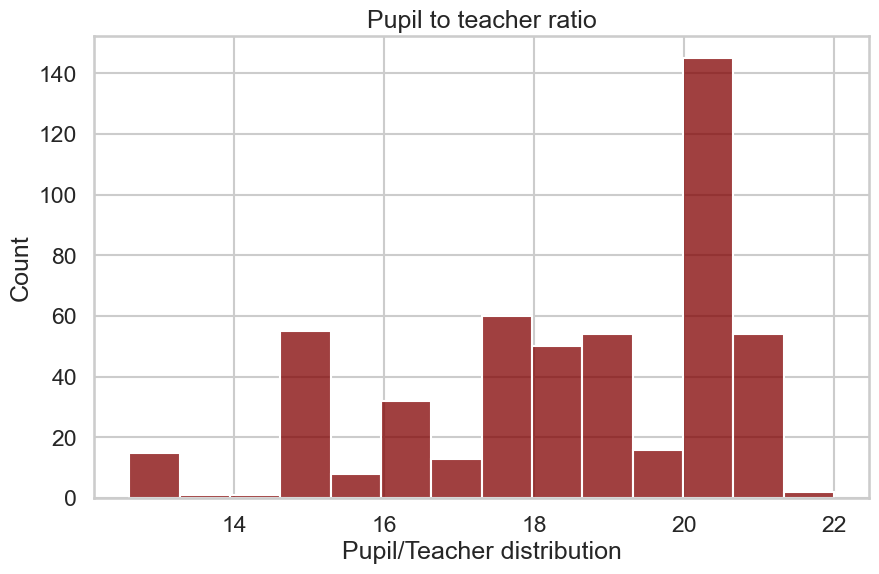

In [ ]:
# pupil to teacher ratio variable histogram
sns.histplot(boston_df['PTRATIO'], color = 'maroon')
plt.title('Pupil to teacher ratio')
plt.xlabel('Pupil/Teacher distribution')
plt.show()

In [ ]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#levene test H0(variances are equal)
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'], center = 'mean')
#p-value is less than 0.05 so we reject levene H0. Variances are not equal 

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [149]:
#H0 - there is no difference in median value if property is near Charlse river or not
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False)
#p-value is less than 0.05 so we reject H0. There is statistical difference in median depending on location near Charles river.

TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#H0 thee is no difference in Median values for all three groups

thirty_five_less = boston_df.loc[boston_df['age_group']=='35 and less']
thirty_five_seventy = boston_df.loc[boston_df['age_group']=='between 35 and 70']
seventy_more = boston_df.loc[boston_df['age_group']=='70 and more']

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_less['MEDV'],thirty_five_seventy['MEDV'],seventy_more['MEDV'])
print(f'Fstat: {f_statistic} and p value  {p_value}')
#p_value is less then 0.05 so we reject H0. There is difference in Median depanding on percentage of old houses

Fstat: 36.40764999196599 and p value  1.7105011022702984e-15


In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
#H0 - there is no relationship between  Nitric oxide concentration and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS']) 
#p_value is less then 0.05 so we reject H0. There is strong correlation between NOX concentratin and proportion of non-retail business acres per town

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [ ]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
#H0 - ther is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

#independent value
X = boston_df['DIS']
#dependandt value
y = boston_df['MEDV']
#addin constant
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
prediction = model.predict(X)

model.summary()
#p-value is less than 0.05 so we can reject H0. There is an impact of distance on median value
#R-squared:	0.062 is not that high so other factors have meaning too
#coef is positive 1.0916 so with is means that with every unit more of distance median value increases by 1.0916

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        08:02:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""